# Problem 1

In [4]:
import pandas as pd
path="/Users/yzh/Downloads/ddf--gapminder--systema_globalis-master/ddf--datapoints--population_total--by--geo--time.csv"
origin_tbl=pd.read_csv(path)
import pycountry_convert as pc
#pycountry-convert
origin_tbl=origin_tbl[origin_tbl['time']==2019]
#drop dirty data
origin_tbl=origin_tbl[origin_tbl['geo']!='hos']

origin_tbl.geo=origin_tbl.geo.str.upper().apply(pc.country_alpha3_to_country_alpha2)

origin_tbl=origin_tbl[origin_tbl['geo']!='TL']
origin_tbl.geo=origin_tbl.geo.apply(pc.country_alpha2_to_continent_code)

origin_tbl=origin_tbl.groupby('geo').sum()


In [82]:
origin_tbl=origin_tbl.drop(['time'],axis=1)

In [86]:
origin_tbl

,population_total
geo,
AF,1318295844
AS,4582812622
EU,742765033
NA,587598298
OC,40944029
SA,431698707


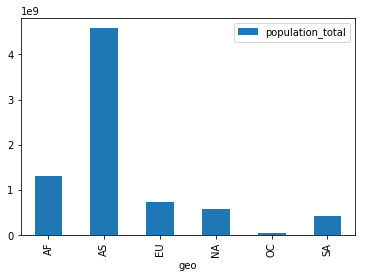

In [85]:
origin_tbl.plot.bar()

In [87]:
4582812622+587598298 #asia and ocean continent, actually 5 billion in 2019 rather than 4 billion

5170410920

In [67]:
 587598298+ 431698707 #America

1019297005

In [ ]:
1318295844 #africa

In [ ]:
742765033 # about 1 billion in EU

# problem 2


In [29]:
path = "/Users/yzh/Downloads/ddf--gapminder--systema_globalis-master/ddf--datapoints--alternative_gdp_per_capita_ppp_wb--by--geo--time.csv"
tbl=pd.read_csv(path)
popu=pd.read_csv('/Users/yzh/Downloads/ddf--gapminder--systema_globalis-master/ddf--datapoints--population_total--by--geo--time.csv')

## By country

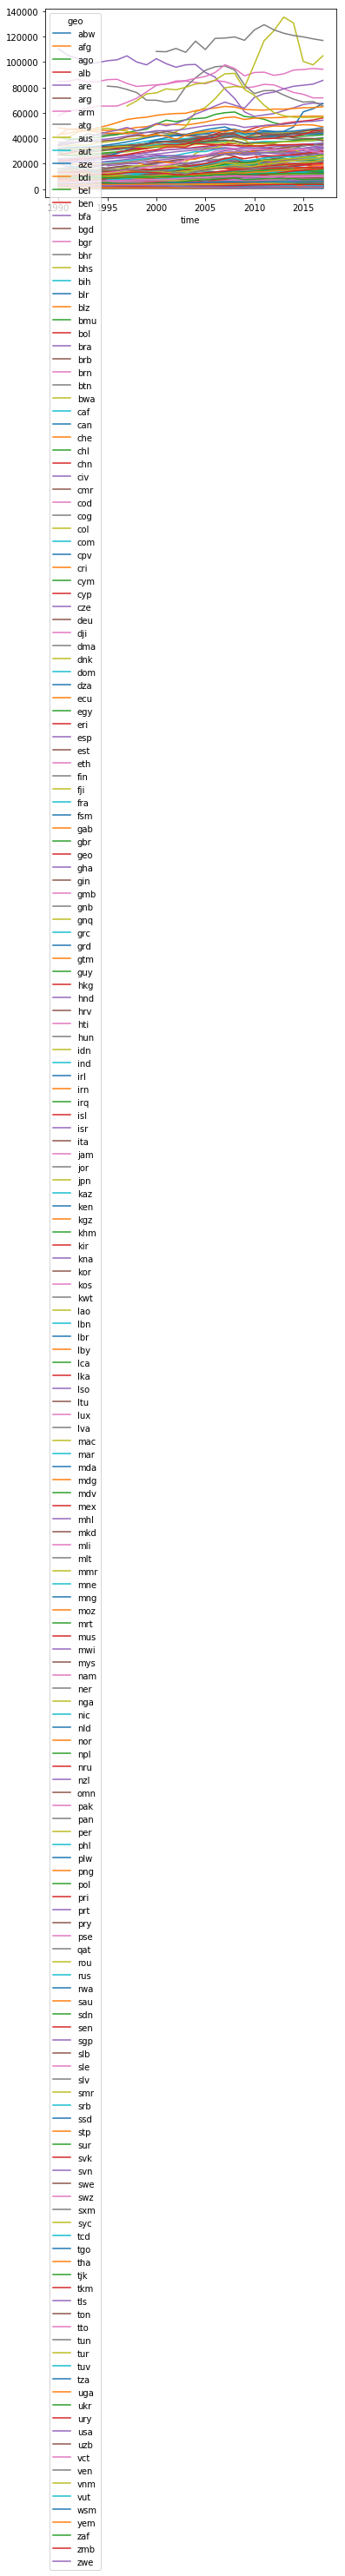

In [13]:

df = tbl.pivot(index='time', columns='geo', values='alternative_gdp_per_capita_ppp_wb')
df.plot()

## by continent

In [43]:
import numpy as np
tbl=pd.read_csv(path)
# tbl=tbl[tbl['geo']!='hos']
# tbl=tbl[tbl['geo']!='ant']
# tbl=tbl[tbl['geo']!='gbg']
# tbl=tbl[tbl['geo']!='gbm']
tbl=tbl[tbl['geo']!='kos']

#get population data
tbl=tbl.merge(popu,how="left")
tbl=tbl.dropna()
tbl.geo=tbl.geo.str.upper().apply(pc.country_alpha3_to_country_alpha2)



tbl=tbl[tbl['geo']!='SX']
tbl=tbl[tbl['geo']!='TL']
tbl.geo=tbl.geo.apply(pc.country_alpha2_to_continent_code)
#take population into consideration to get GDP/capita for each continent
g_wavg= lambda x: np.average(x.alternative_gdp_per_capita_ppp_wb, weights=x.population_total)

tbl=tbl.groupby(['geo','time']).apply(g_wavg).reset_index()

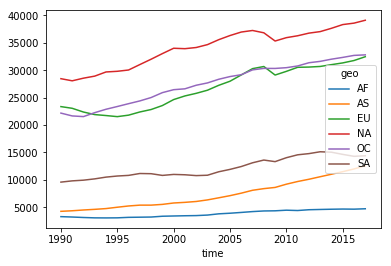

In [44]:
df = tbl.pivot(index='time', columns='geo', values=0)
df.plot()

# problem 3

## life expectancy

In [48]:
path = "/Users/yzh/Downloads/ddf--gapminder--systema_globalis-master/ddf--datapoints--life_expectancy_years--by--geo--time.csv"
tbl=pd.read_csv(path)

#tbl=tbl[tbl['geo']!='hos']
tbl=tbl[tbl['geo']!='ant']
tbl=tbl[tbl['geo']!='chanisl']
# tbl=tbl[tbl['geo']!='gbg']
# tbl=tbl[tbl['geo']!='gbm']
# tbl=tbl[tbl['geo']!='kos']

#get population data
tbl=tbl.merge(popu,how="left")
tbl=tbl.dropna()
tbl.geo=tbl.geo.str.upper().apply(pc.country_alpha3_to_country_alpha2)


tbl=tbl[tbl['geo']!='TL']
tbl=tbl[tbl['geo']!='EH']
tbl.geo=tbl.geo.apply(pc.country_alpha2_to_continent_code)

g_wavg= lambda x: np.average(x.life_expectancy_years, weights=x.population_total)

tbl=tbl.groupby(['geo','time']).apply(g_wavg).reset_index()

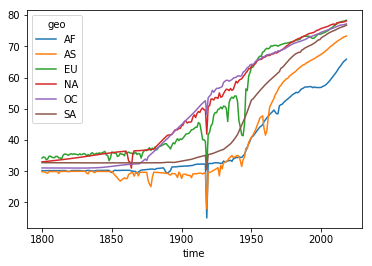

In [49]:
df = tbl.pivot(index='time', columns='geo', values=0)
df.plot()

## mortality

In [65]:
path="/Users/yzh/Downloads/ddf--gapminder--systema_globalis-master/ddf--datapoints--newborn_mortality_rate_per_1000--by--geo--time.csv"
tbl=pd.read_csv(path)

#tbl=tbl[tbl['geo']!='hos']
# tbl=tbl[tbl['geo']!='ant']
# tbl=tbl[tbl['geo']!='chanisl']
# tbl=tbl[tbl['geo']!='gbg']
# tbl=tbl[tbl['geo']!='gbm']
# tbl=tbl[tbl['geo']!='kos']

#get population data
tbl=tbl.merge(popu,how="left")
tbl=tbl.dropna()

tbl.geo=tbl.geo.str.upper().apply(pc.country_alpha3_to_country_alpha2)


tbl=tbl[tbl['geo']!='TL']
# tbl=tbl[tbl['geo']!='EH']
tbl.geo=tbl.geo.apply(pc.country_alpha2_to_continent_code)

g_wavg= lambda x: np.average(x.newborn_mortality_rate_per_1000, weights=x.population_total)

tbl=tbl.groupby(['geo','time']).apply(g_wavg).reset_index()

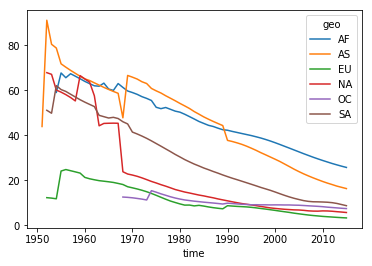

In [66]:
df = tbl.pivot(index='time', columns='geo', values=0)
df.plot()

# problem 4

In [67]:
path="/Users/yzh/Downloads/ddf--gapminder--systema_globalis-master/ddf--datapoints--adults_with_hiv_percent_age_15_49--by--geo--time.csv"
tbl=pd.read_csv(path)


#tbl=tbl[tbl['geo']!='hos']
# tbl=tbl[tbl['geo']!='ant']
# tbl=tbl[tbl['geo']!='chanisl']
# tbl=tbl[tbl['geo']!='gbg']
# tbl=tbl[tbl['geo']!='gbm']
# tbl=tbl[tbl['geo']!='kos']

#get population data
tbl=tbl.merge(popu,how="left")
tbl=tbl.dropna()
tbl.geo=tbl.geo.str.upper().apply(pc.country_alpha3_to_country_alpha2)


#tbl=tbl[tbl['geo']!='TL']
# tbl=tbl[tbl['geo']!='EH']
tbl.geo=tbl.geo.apply(pc.country_alpha2_to_continent_code)

g_wavg= lambda x: np.average(x.adults_with_hiv_percent_age_15_49, weights=x.population_total)

tbl=tbl.groupby(['geo','time']).apply(g_wavg).reset_index()

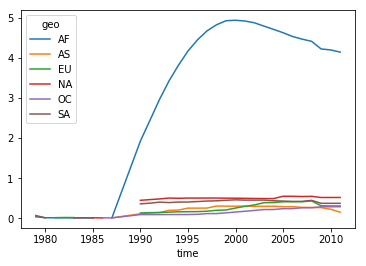

In [68]:
df = tbl.pivot(index='time', columns='geo', values=0)
df.plot()